# Gun Ownership vs. Homicide Rates in the Western Hemisphere

#### Exploring the relationship between gun ownership and homicide rates between countries in the western hemisphere (N. America & S. AMerica). Data sources and processing of data is included below. The purpose of this is for a fun exploration of data and practive with cleaning and organizing data into a presentable fashion.

Homicides data source: https://dataunodc.un.org/dp-intentional-homicide-victims

Guns data source: https://worldpopulationreview.com/country-rankings/gun-ownership-by-country

In [1]:
# import tools and load data
import pandas as pd
r = pd.read_csv(r"C:\Users\jdgoe\Downloads\Untitled spreadsheet - data_cts_intentional_homicide.csv")

Get rid of all data that would cause countries to appear twice. Use homicide stat only if it was counted by a victim of intentional homicide. All genders included. Rate per 100,000. Years 2015-2020

In [2]:
# use only data that fits certain criteria 
r = r[(r['Dimension'] == 'Total') & (r['Region'] == 'Americas') & (r['Indicator'] == 'Victims of intentional homicide') & (r['Unit of measurement'] == 'Rate per 100,000 population') & (r['Sex'] == 'Total')]
r = r.loc[(r['Year'] >= 2015) & (r['Year'] <= 2020)]


In [3]:
# set rows to delete
cdel = [2, 3, 4, 5, 6, 7, 8, 10, 12]

In [4]:
r = r.drop(r.columns[cdel], axis=1)

In [5]:
r = r.rename(columns={'VALUE': 'Homicide Rate per 100k'})

In [6]:
# Create single column that gives the avergae murder rate for a country between 2015-2020
r['Avg Yearly Homicide Rate per 100k 2015-2020'] =  r.groupby('Country')['Homicide Rate per 100k'].transform(lambda x: x.sum() / x.count())


In [7]:
cdel2 = [2, 3]
r = r.drop(r.columns[cdel2], axis=1)

In [8]:
r.drop_duplicates(subset=['Country'], inplace=True)

In [9]:
guns = pd.read_csv(r"C:\Users\jdgoe\Downloads\data.csv")

In [10]:
guns.head()

,place,pop2023,growthRate,area,country,cca3,cca2,ccn3,region,subregion,landAreaKm,density,densityMi,Rank,firearms,per100,military,lawEnf,rank
0,840,339996563.0,0.00505,9372610.0,United States,USA,US,840,North America,Northern America,9147420.0,37.1686,96.2666,3,393347000,120.5,4535380.0,1016000.0,1
1,238,3791.0,0.00291,12173.0,Falkland Islands,FLK,FK,238,South America,"South America, Latin America",12173.0,0.3114,0.8066,231,2000,62.1,NaN,30.0,2
2,887,34449825.0,0.02235,527968.0,Yemen,YEM,YE,887,Asia,"Western Asia, The Middle East",527970.0,65.2496,168.9964,44,14859000,52.8,28500.0,NaN,3
3,540,292991.0,0.01049,18575.0,New Caledonia,NCL,NC,540,Oceania,Melanesia,18280.0,16.0280,41.5124,185,115000,42.5,NaN,700.0,4
4,688,7149077.0,-0.01001,88361.0,Serbia,SRB,RS,688,Europe,Southern Europe,87460.0,81.7411,211.7095,105,2719000,39.1,384422.0,53100.0,5


In [11]:
guns = guns.rename(columns={'country': 'Country'})

## Merge dataframes

In [12]:
merged = pd.merge(r, guns[['cca3', 'per100']], left_on='Iso3_code', right_on='cca3', how='left')

In [13]:
final = merged.dropna()

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Plot Data

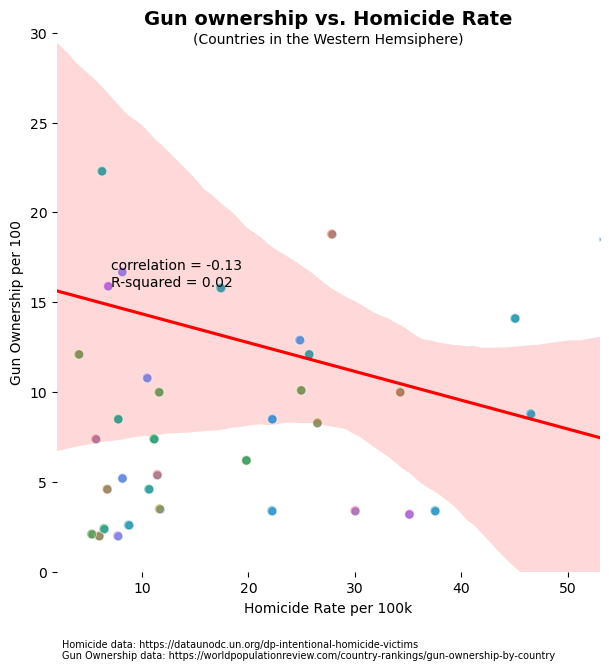

In [15]:
fig = plt.figure(figsize=(7, 7))
ax = sns.regplot(x='Avg Yearly Homicide Rate per 100k 2015-2020', y='per100', data=final, scatter_kws={'s': 25}, line_kws={'color': 'red'})
sns.scatterplot(x='Avg Yearly Homicide Rate per 100k 2015-2020', y='per100', 
hue='Country', data=final, s=50, alpha=0.6, legend=False)

ax.set(ylim=(0, 30))
ax.set(xlim=(2, 53))
ax.set(xlabel='Homicide Rate per 100k', ylabel='Gun Ownership per 100')
title = ax.set_title('Gun ownership vs. Homicide Rate', fontsize=14)
ax.text(0.5, 0.98, '(Countries in the Western Hemsiphere)', transform=ax.transAxes, fontsize=10, ha='center')
title.set_fontweight('bold')
ax.text(0.01, -0.14, 'Homicide data: https://dataunodc.un.org/dp-intentional-homicide-victims', transform=ax.transAxes, fontsize=7) #add citations
ax.text(0.01, -0.16, 'Gun Ownership data: https://worldpopulationreview.com/country-rankings/gun-ownership-by-country', transform=ax.transAxes, fontsize=7)

sns.despine(left=True, bottom=True)

# calculate R-squared
x = final['Avg Yearly Homicide Rate per 100k 2015-2020']
y = final['per100']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

# add R-squared value to plot
ax.annotate(f"R-squared = {r_squared:.2f}", xy=(0.10, 0.53), xycoords='axes fraction')
# calculate Correlation
x = final['Avg Yearly Homicide Rate per 100k 2015-2020']
y = final['per100']
slope, intercept, r_value, p_value, std_err = stats.linregress(final['Avg Yearly Homicide Rate per 100k 2015-2020'], final['per100'])
ax.text(0.10, 0.56, f'correlation = {r_value:.2f}', transform=ax.transAxes)

plt.show()

In [16]:
finalt = final.rename(columns={'Avg Yearly Homicide Rate per 100k 2015-2020': 'Homicide Rate'})

In [17]:
from tabulate import tabulate
finalt = finalt.iloc[:, [1,2,4]]
finalt = finalt.sort_values('Homicide Rate', ascending=False)
table_str = tabulate(finalt, headers='keys', showindex=False)
print(table_str)

Country                               Homicide Rate    per100
----------------------------------  ---------------  --------
El Salvador                                67.9058       12
Venezuela (Bolivarian Republic of)         53.4091       18.5
Jamaica                                    46.5192        8.8
Honduras                                   45.0468       14.1
Saint Kitts and Nevis                      37.5362        3.4
Trinidad and Tobago                        35.1291        3.2
Belize                                     34.2549       10
Saint Vincent and the Grenadines           30.0204        3.4
Bahamas                                    27.8163       18.8
Brazil                                     26.4826        8.3
Guatemala                                  25.6946       12.1
Colombia                                   24.9403       10.1
Mexico                                     24.8063       12.9
Saint Martin (French Part)                 22.2301        8.5
Saint Lucia 

In [18]:
merged2 = pd.merge(r, guns[['cca3', 'firearms']], left_on='Iso3_code', right_on='cca3', how='left')
final2 = merged2.dropna()

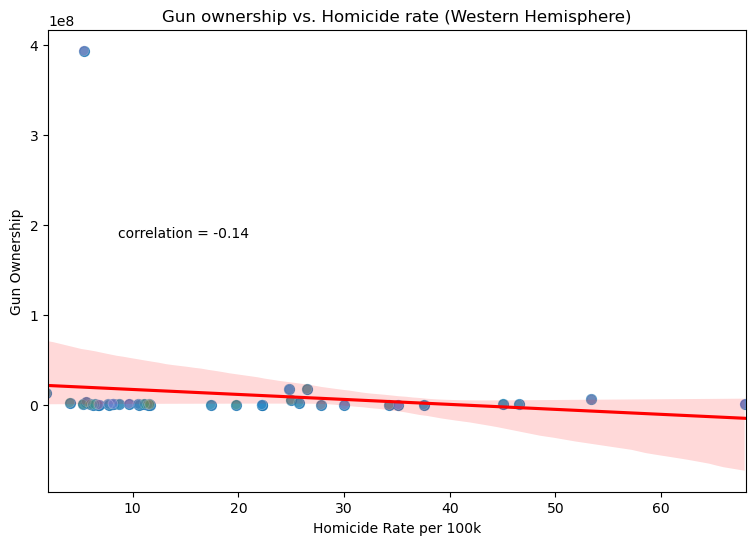

In [19]:
fig = plt.figure(figsize=(9, 6))
ax = sns.regplot(x='Avg Yearly Homicide Rate per 100k 2015-2020', y='firearms', data=final2, scatter_kws={'s': 50}, line_kws={'color': 'red'})
sns.scatterplot(x='Avg Yearly Homicide Rate per 100k 2015-2020', y='firearms', hue='Country', data=final2, s=50, alpha=0.2, legend=False)

# ax.set(ylim=(-10000, 200000000))
ax.set(xlim=(2, 68))
ax.set(xlabel='Homicide Rate per 100k', ylabel='Gun Ownership')
ax.set(title='Gun ownership vs. Homicide rate (Western Hemisphere)')

# calculate Correlation
x = final2['Avg Yearly Homicide Rate per 100k 2015-2020']
y = final2['firearms']
slope, intercept, r_value, p_value, std_err = stats.linregress(final2['Avg Yearly Homicide Rate per 100k 2015-2020'], final2['firearms'])
ax.text(0.10, 0.55, f'correlation = {r_value:.2f}', transform=ax.transAxes)


plt.show()

Now let's try removing the United states since the gun wonership rate is so high.

In [20]:
no_us = final.drop(37)

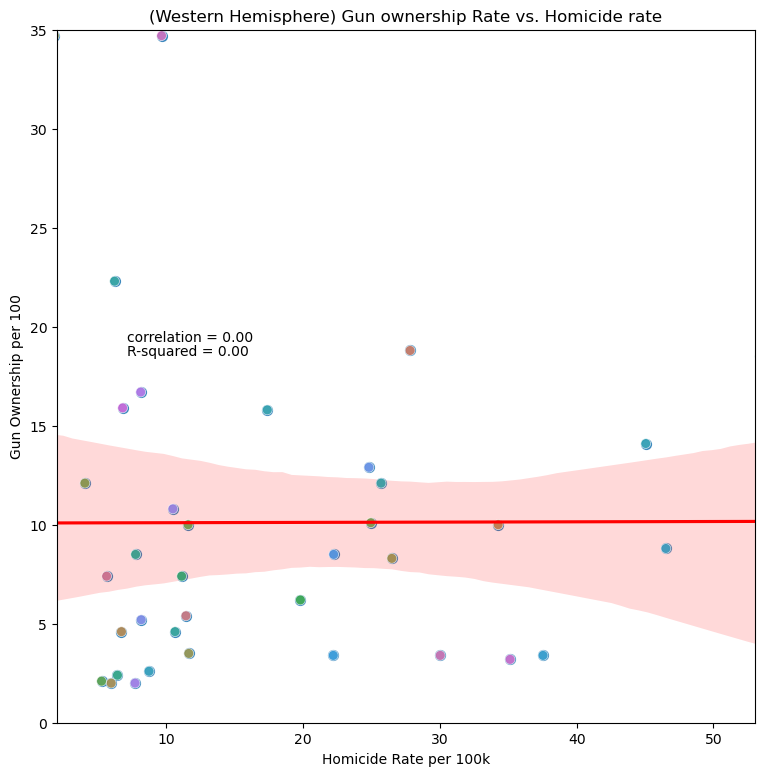

In [21]:
fig = plt.figure(figsize=(9, 9))
ax = sns.regplot(x='Avg Yearly Homicide Rate per 100k 2015-2020', y='per100', data=no_us, scatter_kws={'s': 50}, line_kws={'color': 'red'})
sns.scatterplot(x='Avg Yearly Homicide Rate per 100k 2015-2020', y='per100', 
hue='Country', data=no_us, s=50, alpha=0.7, legend=False)

ax.set(ylim=(0, 35))
ax.set(xlim=(2, 53))
ax.set(xlabel='Homicide Rate per 100k', ylabel='Gun Ownership per 100')
ax.set(title='(Western Hemisphere) Gun ownership Rate vs. Homicide rate')

# calculate R-squared
x = no_us['Avg Yearly Homicide Rate per 100k 2015-2020']
y = no_us['per100']
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
r_squared = r_value**2

# add R-squared value to plot
ax.annotate(f"R-squared = {r_squared:.2f}", xy=(0.10, 0.53), xycoords='axes fraction')
# calculate Correlation
x = no_us['Avg Yearly Homicide Rate per 100k 2015-2020']
y = no_us['per100']
slope, intercept, r_value, p_value, std_err = stats.linregress(no_us['Avg Yearly Homicide Rate per 100k 2015-2020'], no_us['per100'])
ax.text(0.10, 0.55, f'correlation = {r_value:.2f}', transform=ax.transAxes)

plt.show()

Wow. dead even. Evidence seems to show that gun ownership has no real effect on homicide rate.